In [1]:
!pip install pandas
!pip install openml
!pip install plotly



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 32.0 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=c154bf28be5bf00ca37a0fbbb2975630042f7713085fed49acc917764658d1ad
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [2]:
import openml
import pandas as pd
import matplotlib.pyplot as plt


dataset_id = 43566
data = openml.datasets.get_dataset(dataset_id)
df, *_ = data.get_data()
print(df.head())
print(df.info())

   Fide_id                 Name Federation Gender  Year_of_birth Title  \
0  1503014      Carlsen, Magnus        NOR      M         1990.0    GM   
1  2020009     Caruana, Fabiano        USA      M         1992.0    GM   
2  4100018      Kasparov, Garry        RUS      M         1963.0    GM   
3  8603677          Ding, Liren        CHN      M         1992.0    GM   
4  4168119  Nepomniachtchi, Ian        RUS      M         1990.0    GM   

   Standard_Rating  Rapid_rating  Blitz_rating Inactive_flag  
0           2863.0        2881.0        2886.0          None  
1           2835.0        2773.0        2711.0          None  
2           2812.0        2783.0        2801.0             i  
3           2791.0        2836.0        2788.0          None  
4           2784.0        2778.0        2785.0          None  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977687 entries, 0 to 977686
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------        

In [ ]:
!pip install openml


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.1 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=75398958080be672188f6abaea4e1348cb56519fba72faf87a29c474720e9e9e
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
print(df.describe())

            Fide_id  Year_of_birth  Standard_Rating   Rapid_rating  \
count  9.776870e+05  943585.000000    363294.000000  193348.000000   
mean   2.919621e+07    1989.365212      1650.960343    1588.205014   
std    8.039093e+07      19.693809       369.621131     341.257917   
min    1.000130e+05    1077.000000         0.000000    1000.000000   
25%    4.107938e+06    1976.000000      1376.000000    1307.000000   
50%    1.415789e+07    1997.000000      1665.000000    1571.000000   
75%    2.992521e+07    2005.000000      1929.000000    1837.000000   
max    7.060883e+08    2019.000000      2863.000000    2881.000000   

        Blitz_rating  
count  139184.000000  
mean     1659.595758  
std       341.686065  
min      1000.000000  
25%      1389.000000  
50%      1661.000000  
75%      1912.000000  
max      2900.000000  


In [ ]:
import plotly.express as px
fedaration_counts=df["Federation"].value_counts().reset_index()
fedaration_counts.columns=["Federation", "Player_Count"]

fedaration_ratings=df.groupby("Federation")[["Standard_Rating","Rapid_rating","Blitz_rating"]].mean().reset_index()
fedaration_data=pd.merge(fedaration_counts,fedaration_ratings, on="Federation")
top_15_federations=fedaration_data.sort_values(by="Player_Count", ascending=False).head(15)

fig=px.bar(
    top_15_federations,
    x="Federation",
    y=["Standard_Rating","Rapid_rating","Blitz_rating"],
    labels={"value": "ŚREDNI RATING"},
    barmode="group"
)
fig.show()

# 🎯 zad1: Analiza Proporcji Aktywnych Graczy według Płci

### 📄 Opis
Celem tego zadania jest przeanalizowanie proporcji aktywnych graczy według płci oraz ich wizualizacja przy pomocy wykresu kołowego. Wykorzystamy bibliotekę Matplotlib do stworzenia wykresu, który pokazuje udział mężczyzn i kobiet w zbiorze aktywnych zawodników.

---

### 📝 Kroki do wykonania:

#### 1. Filtracja aktywnych graczy 🕵️‍♀️
   - Wyodrębnij jedynie aktywnych graczy, czyli tych, dla których kolumna `Inactive_flag` ma wartość `NaN`.
   - To oznacza, że gracz jest aktywny i zostanie uwzględniony w analizie.

#### 2. Obliczenie liczby aktywnych mężczyzn i kobiet 👩‍🔬👨‍🔬
   - Użyj metody `value_counts()` na kolumnie `Gender` w przefiltrowanym zbiorze danych, aby policzyć, ilu aktywnych graczy jest wśród mężczyzn i kobiet.

#### 3. Przeliczenie liczby na tysiące oraz wyliczenie procentów 📊
   - Oblicz procentowy udział każdej płci, aby zobaczyć proporcje mężczyzn i kobiet w zbiorze aktywnych graczy.
   - Dla lepszej czytelności przelicz liczby na tysiące i przygotuj je do wyświetlenia na wykresie.

#### 4. Tworzenie legendy 🏷️
   - Przygotuj etykiety z liczbą graczy oraz ich procentowym udziałem.
   - Użyj f-stringów, aby sformatować tekst etykiet w formacie: `"Kobiety: 120.5k (16.3%)"`.

#### 5. Tworzenie wykresu kołowego 🥧
   - Użyj `plt.pie()` z Matplotlib, aby stworzyć wykres kołowy pokazujący proporcje mężczyzn i kobiet.
   - Ustaw parametr `autopct='%1.1f%%'`, aby na wykresie były widoczne wartości procentowe dla każdej płci.

---


📌 Podpowiedzi:

- Zliczanie liczby mężczyzn i kobiet: Użyj value_counts() na kolumnie Gender, aby uzyskać liczby mężczyzn i kobiet. Na przykład: gender_counts_active = active_players['Gender'].value_counts().

- Przeliczenie liczby na tysiące: Podziel każdą wartość przez 1000 i zaokrąglij wynik do jednego miejsca po przecinku, aby wartości były wyświetlane jako tysiące. Przykład: (gender_counts_active / 1000).round(1).

- Etykiety dla legendy: Użyj f-stringów do formatowania tekstu, np. f"Mężczyźni: {liczba}k ({procent}%)", aby stworzyć informacyjne etykiety z liczbą i procentem graczy każdej płci.

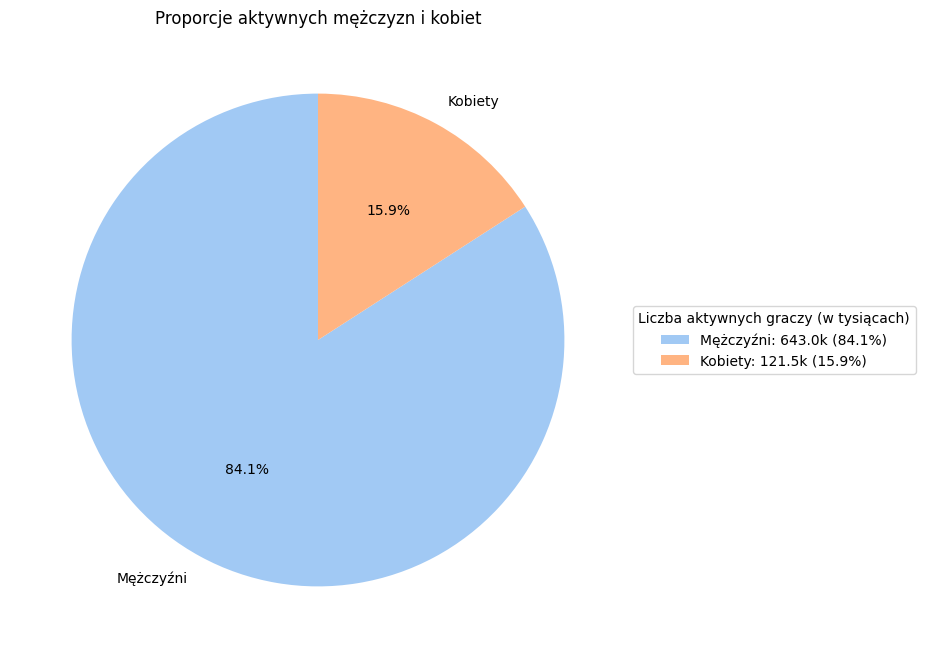

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

active_players = df[df['Inactive_flag'].isna()]

gender_counts_active = active_players['Gender'].value_counts()
total_active_players = gender_counts_active.sum()
gender_counts_active_thousands = (gender_counts_active / 1000).round(1)
gender_percentages = (gender_counts_active / total_active_players * 100).round(1)

labels = [
    f"Mężczyźni: {gender_counts_active_thousands['M']}k ({gender_percentages['M']}%)",
    f"Kobiety: {gender_counts_active_thousands['F']}k ({gender_percentages['F']}%)"
]

plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts_active,
    labels=['Mężczyźni', 'Kobiety'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel")[:len(gender_counts_active)]
)
plt.title("Proporcje aktywnych mężczyzn i kobiet")

plt.legend(labels, title="Liczba aktywnych graczy (w tysiącach)", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


In [11]:
import plotly.express as px

gender_counts_active = active_players['Gender'].value_counts()

fig = px.pie(
    names=gender_counts_active.index,
    values=gender_counts_active.values,
    title="Proporcje aktywnych mężczyzn i kobiet",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textinfo='percent')

fig.show()


# 🎯 ZAD2: Analiza Top 20 Zawodników według Rankingu Standardowego i Rapidowego

### 📄 Opis zadania
Celem tego zadania jest przeanalizowanie 20 najlepszych aktywnych szachistów w dwóch kategoriach rankingowych: standardowym i rapidowym. Przeanalizujemy, jak wiek zawodników wpływa na ich wyniki oraz zobaczymy, jak rozkładają się zawodnicy z różnych federacji w obu rankingach.

---

### 📝 Kroki do wykonania

#### Krok 1: Obliczenie wieku zawodników 🧮
   - Używamy kolumny `Year_of_birth`, aby obliczyć wiek zawodników, odejmując rok urodzenia od bieżącego roku (2024).
   - Wartości `NaN` w `Year_of_birth` są wypełniane przez `0`, aby uniknąć błędów przy przekształcaniu do typu całkowitego.

#### Krok 2: Filtracja aktywnych graczy 🔍
   - Wybieramy tylko aktywnych zawodników (ci, którzy mają `NaN` w kolumnie `Inactive_flag`), aby skoncentrować się na obecnie uczestniczących w rozgrywkach.

#### Krok 3: Wybór Top 20 zawodników w każdym rankingu 🏆
   - Korzystając z kolumny `Standard_Rating`, wybieramy 20 zawodników z najwyższymi wynikami dla rankingu standardowego.
   - Następnie z kolumny `Rapid_rating` wybieramy 20 najlepszych zawodników dla rankingu rapidowego.
   - Dodajemy kolumnę `Ranking_Type`, aby odróżnić typ rankingu w wizualizacji.

#### Krok 4: Tworzenie wykresu punktowego w Seaborn 📊
   - Korzystamy z `seaborn.scatterplot`, aby stworzyć wykres punktowy dla obu rankingów:
     - **Osie**: Oś X przedstawia wiek zawodników, a oś Y – wartość rankingu.
     - **Kolory**: Zawodnicy są rozróżnieni według federacji, co ułatwia identyfikację ich przynależności.
   - Wykresy są umieszczone obok siebie (dla rankingu standardowego i rapidowego), co umożliwia łatwe porównanie obu kategorii.

---

<ipython-input-4-2e8e6d426ed6>:18: UserWarning: 
The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
<ipython-input-4-2e8e6d426ed6>:31: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


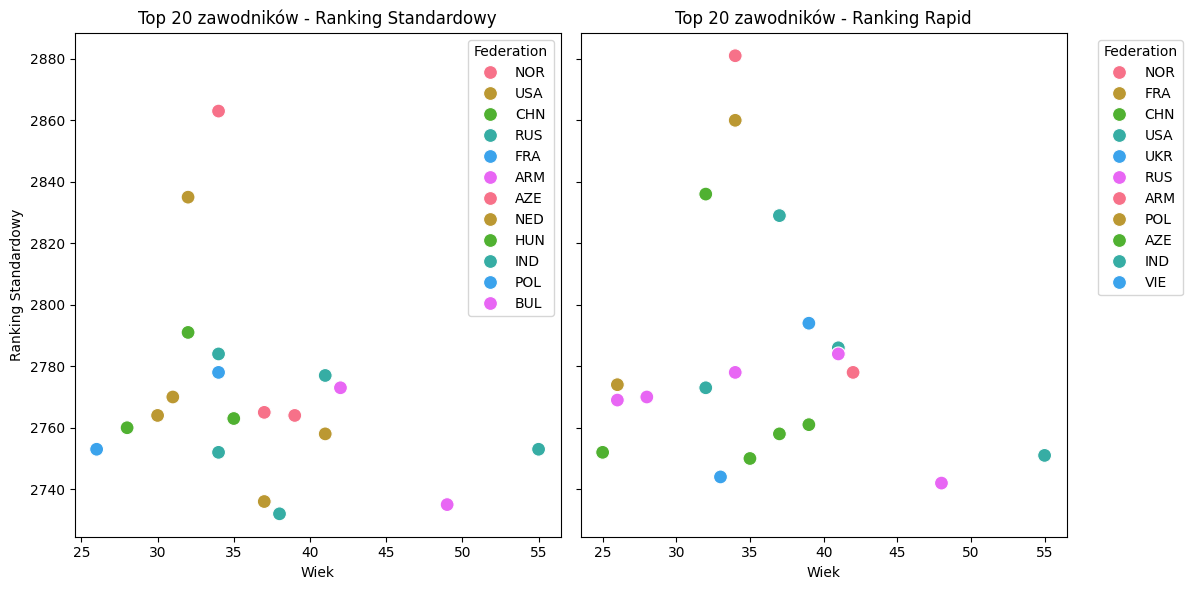

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Age'] = 2024 - df['Year_of_birth']

active_players = df[df['Inactive_flag'].isna()]

top_standard = active_players.nlargest(20, 'Standard_Rating')
top_standard['Ranking_Type'] = 'Standard'

top_rapid = active_players.nlargest(20, 'Rapid_rating')
top_rapid['Ranking_Type'] = 'Rapid'

fig, axes = plt.subplots(1,2, figsize=(12, 6), sharey=True)
palette = sns.color_palette("husl", as_cmap=False)

sns.scatterplot(
    data=top_standard,
    x='Age',
    y='Standard_Rating',
    hue='Federation',
    palette=palette,
    s=100,
    ax=axes[0]
)
axes[0].set_title("Top 20 zawodników - Ranking Standardowy")
axes[0].set_xlabel("Wiek")
axes[0].set_ylabel("Ranking Standardowy")

sns.scatterplot(
    data=top_rapid,
    x='Age',
    y='Rapid_rating',
    hue='Federation',
    palette=palette,
    s=100,
    ax=axes[1]
)
axes[1].set_title("Top 20 zawodników - Ranking Rapid")
axes[1].set_xlabel("Wiek")
axes[1].set_ylabel("Ranking Rapid")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Federation")
plt.tight_layout()
plt.show()

In [6]:
import plotly.express as px

fig_standard = px.scatter(
    top_standard,
    x='Age',
    y='Standard_Rating',
    color='Federation',
    title="Top 20 zawodników - Ranking Standardowy",
    labels={
        "Age": "Wiek",
        "Standard_Rating": "Ranking Standardowy",
        "Federation": "Federacja"
    },
    hover_data=['Age', 'Standard_Rating', 'Federation']
)

fig_standard.update_layout(
    legend_title="Federation",
    legend=dict(x=1.05, y=1),
    title=dict(x=0.5)
)

fig_rapid = px.scatter(
    top_rapid,
    x='Age',
    y='Rapid_rating',
    color='Federation',
    title="Top 20 zawodników - Ranking Rapid",
    labels={
        "Age": "Wiek",
        "Rapid_rating": "Ranking Rapid",
        "Federation": "Federacja"
    },
    hover_data=['Age', 'Rapid_rating', 'Federation']
)

fig_rapid.update_layout(
    legend_title="Federation",
    legend=dict(x=1.05, y=1),
    title=dict(x=0.5)
)

fig_standard.show()
fig_rapid.show()



 🥇 ZAD 2.1: Analiza Udziału Tytułów wśród Aktywnych Graczy

### 🎯 Cel zadania

Stworzymy wykres kołowy pokazujący procentowy udział poszczególnych tytułów wśród aktywnych graczy. W wersji rozszerzonej uwzględnimy także podział na płeć, aby wizualizacja była bardziej informatywna.

---------------------------------------

### 📝 Instrukcje

#### Podstawowa wersja ✅
1. **Przygotowanie danych**:
   - Oblicz liczbę graczy w każdej kategorii tytułów, korzystając z `value_counts()` na kolumnie `Title`.
2. **Tworzenie wykresu kołowego**:
   - Wykorzystaj `plotly.express.pie` do utworzenia wykresu:
     - Parametr `names` ustawia etykiety dla poszczególnych segmentów ( w tym przypadku nazwę tytułu).
     - Parametr `values` ustawia wartości segmentów ( w tym przypadku  liczbę zawodników w każdej kategorii).
   - W Plotly, gdy ustawisz `textinfo='percent+label` w fig.update_traces, procenty są automatycznie obliczane przez bibliotekę

#### 🔗 Linki pomocnicze
- https://plotly.com/python-api-reference/generated/plotly.express.pie
-https://www.geeksforgeeks.org/pie-plot-using-plotly-in-python/

#### Rozszerzona wersja z podziałem na płeć 🚀

1. **Przygotuj dane**: Pogrupuj dane według Title i Gender, a następnie przekształć wynik, aby uzyskać liczbę mężczyzn i kobiet w każdej kategorii tytułów. Użyj groupby(['Title', 'Gender']).size().unstack(fill_value=0), aby stworzyć tabelę, w której wiersze odpowiadają tytułom, a kolumny zawierają liczbę mężczyzn (M) i kobiet (F).

2. **Stwórz listę etykiet**: Korzystając z pętli, przejdź przez każdy tytuł w danych i dla każdego z nich pobierz liczbę mężczyzn i kobiet z tabeli `(  .loc[title, 'M'] i .loc[title, 'F']`). Następnie połącz te informacje w jednym napisie, np. `"GM (M: 10, F: 2)"`.

---------------------------------

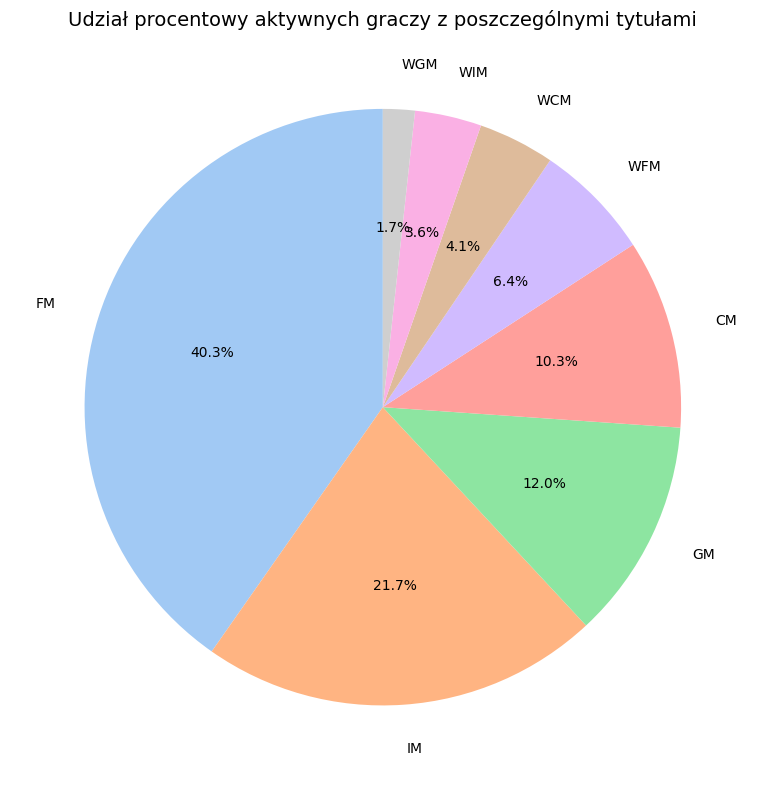

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

active_players = df[df['Inactive_flag'].isna()]
title_counts = active_players['Title'].value_counts()

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel", n_colors=len(title_counts))

plt.pie(
    title_counts,
    labels=title_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labeldistance=1.15
)

plt.title("Udział procentowy aktywnych graczy z poszczególnymi tytułami", fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
active_players = df['Inactive_flag'].isna()
title_counts = df[active_players]['Title'].value_counts()
print(title_counts)
fig = px.pie(
    names=title_counts.index,
    values=title_counts.values,
    title="Udział procentowy aktywnych graczy z poszczególnymi tytułami ",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textinfo='percent+label')
fig.show()



Title
FM     4346
IM     2337
GM     1292
CM     1107
WFM     686
WCM     447
WIM     390
WGM     186
Name: count, dtype: int64


In [9]:
import plotly.express as px


title_gender_counts = active_players.groupby(['Title', 'Gender']).size().unstack(fill_value=0)
title_counts = active_players['Title'].value_counts()

labels = [f"{title} (M: {title_gender_counts.loc[title, 'M']}, F: {title_gender_counts.loc[title, 'F']})"
          for title in title_counts.index]


fig = px.pie(
    names=labels,
    values=title_counts.values,
    title="Udział tytułów wśród aktywnych graczy",
    color_discrete_sequence=px.colors.qualitative.Pastel
)


fig.update_traces(
    textinfo='percent',
    hovertemplate='<b>%{label}</b><br>Procent: %{percent}<br>',
    customdata=title_gender_counts.values
)

fig.show()

####🌍 ZAD3: Analiza Liczby Aktywnych Graczy w Poszczególnych Federacjach na Mapie Świata
------------------------------------------

### 🎯 Cel zadania
Celem tego zadania jest wizualizacja liczby aktywnych szachistów na całym świecie w różnych federacjach, przedstawiona za pomocą interaktywnej mapy.

---

### 🔧 Instrukcje
#### Krok 1: Przygotowanie danych
1. **Filtracja aktywnych graczy**: Uwzględniamy tylko aktywnych zawodników. W kolumnie `Inactive_flag` wartość `NaN` oznacza gracza aktywnego.
2. **Agregacja danych**: Korzystamy z `value_counts()` na kolumnie `Federation`, aby uzyskać liczbę aktywnych zawodników dla każdej federacji.

#### Krok 2: Tworzenie mapy
Używamy funkcji `plotly.express.choropleth`, aby stworzyć interaktywną mapę świata, gdzie kolor każdego kraju reprezentuje liczbę aktywnych graczy.

### Parametry dla `px.choropleth`
- **`locations`** 🌐 – kolumna zawierająca kody krajów w formacie ISO Alpha-3, np. "POL" dla Polski. W naszym przypadku będzie to kolumna `"Federation"`.
- **`color`** 🎨 – kolumna z wartościami liczbowymi, które będą reprezentowane kolorem na mapie, czyli `"Active_Players"`.
- **`hover_name`** 🖱️ – kolumna, która wyświetla nazwę federacji po najechaniu kursorem na kraj, również `"Federation"`.


### 🔗 Dodatkowe linki
https://plotly.com/python/choropleth-maps/

https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

In [ ]:
import plotly.express as px
import pandas as pd

active_players = df[df['Inactive_flag'].isna()]

federation_counts = active_players['Federation'].value_counts().reset_index()
federation_counts.columns = ['Federation', 'Active_Players']

fig = px.choropleth(
    federation_counts,
    locations='Federation',
    color='Active_Players',
    hover_name='Federation',
    color_continuous_scale='Turbo',
    title="Liczba Aktywnych Graczy w Każdej Federacji"
)

# color_continous_scale='Turbo'

fig.show()


Przykład wizualizacji przedstawiający liczbę graczy z tytułem GM wsródza pomocą biblioteki Plotly